In [1]:
#Data wrangling and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_style("whitegrid")

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import dataset using pandas
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#Preview first five rows of the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.drop("Id", axis=1, inplace=True)
df_test.drop("Id", axis=1, inplace=True)

df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)

In [5]:
print("Train data dims: " + str(df_train.shape))
print("Test data dims: " + str(df_test.shape))

Train data dims: (1460, 80)
Test data dims: (1459, 79)


There are quite a number of features to deal with in this dataset. At first glance, there will be a lot of data wrangling to do before the data can be used for machine learning.

In [6]:
df_train.describe(include="all")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,15,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,20,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,536,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,NaN,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,NaN,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,NaN,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,NaN,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,NaN,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,NaN,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Documentation is provided by the author of the Ames dataset, which can be assessed here: www.amstat.org/publications/jse/v19n3/decock.pdf.

At the end of Section 2: The Ames Housing Data, the author recommends the removal of any entry with GrLivArea > 4000.

We will do that here.

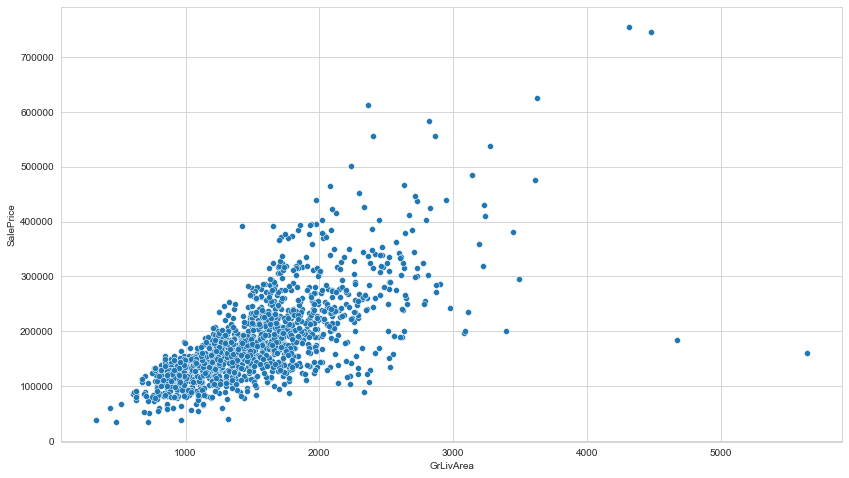

In [7]:
# "I would recommend removing any houses with more than 4000 square feet from the data set."
f = plt.figure(figsize=(14,8))

sb.scatterplot(x="GrLivArea", y="SalePrice", data=df_train);

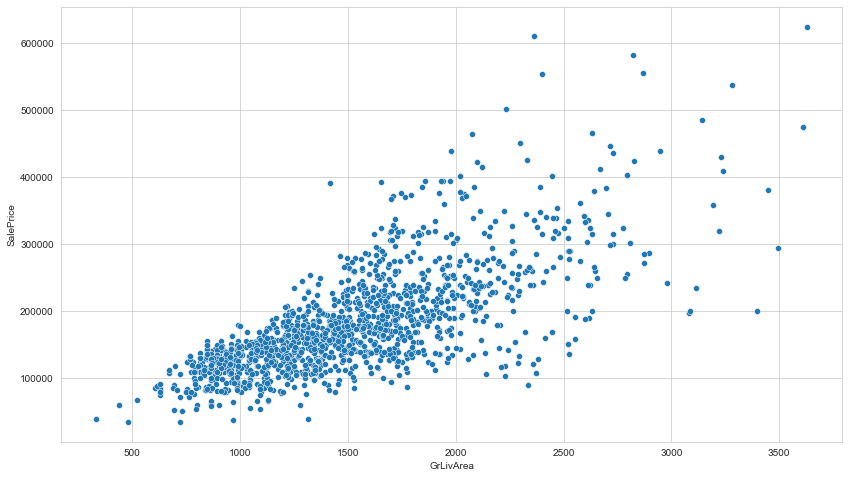

In [8]:
#Remove all houses with GrLivArea above 4000
df_train = df_train[df_train["GrLivArea"] <= 4000]

f = plt.figure(figsize=(14,8))
sb.scatterplot(x="GrLivArea", y="SalePrice", data=df_train);

## Managing missing data

In [9]:
# Display missing values
def missing_values(df):
    
    size = len(df)
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/size*100).sort_values(ascending=False)

    missing_data = pd.concat([total, round(percent, 3)], axis=1, keys=['Total', 'Percent'])
    
    return missing_data

In [10]:
missing_values(df_train).head(20)

,Total,Percent
PoolQC,1451,99.657
MiscFeature,1402,96.291
Alley,1365,93.750
Fence,1176,80.769
FireplaceQu,690,47.390
LotFrontage,259,17.788
GarageYrBlt,81,5.563
GarageCond,81,5.563
GarageType,81,5.563
GarageFinish,81,5.563


"NA" was wrongly identified to be a NULL value, when it was one of the categories for the features below.

In [11]:
cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageCond", "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtFinType1"]

for col_name in cols:
    
    if df_test[col_name].dtype == "object":
        df_train[col_name].fillna("None", inplace=True)
        df_test[col_name].fillna("None", inplace=True)
        
    else:
        df_train[col_name].fillna(0, inplace=True)
        df_test[col_name].fillna(0, inplace=True)

There are a few exceptions: true missing data. Usually it is quite safe to replace the missing data with mean/median/mode values if the number of missing values is small.

In [12]:
# Number of missing values for LotFrontage is not large but not small either. In a real world scenario, the optimal method would be to replace missing values with more machine learning models.
# We do the "quick and dirty" method here to save time
df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean(), inplace=True)
df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean(), inplace=True)

df_train["MasVnrType"].fillna(df_train["MasVnrType"].mode()[0], inplace=True)
df_test["MasVnrType"].fillna(df_test["MasVnrType"].mode()[0], inplace=True)

df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), inplace=True)

df_train["Electrical"].fillna(df_train["Electrical"].mode()[0], inplace=True)
df_test["Electrical"].fillna(df_test["Electrical"].mode()[0], inplace=True)

df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean(), inplace=True)
df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].mean(), inplace=True)

In [13]:
missing_values(df_train).head()

,Total,Percent
MSSubClass,0,0.0
MSZoning,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


Now we take a look at the missing values for the testing data.

In [14]:
missing_values(df_test).head(20)

,Total,Percent
MSZoning,4,0.274
BsmtFullBath,2,0.137
BsmtHalfBath,2,0.137
Utilities,2,0.137
Functional,2,0.137
BsmtFinSF1,1,0.069
KitchenQual,1,0.069
Exterior1st,1,0.069
GarageCars,1,0.069
GarageArea,1,0.069


There isn't any "wrongly labelled" category, so we simply impute missing values with mean/mode respectively.

In [15]:
cols = ["MSZoning", "Functional", "BsmtFullBath", "Utilities", "BsmtHalfBath", "KitchenQual", "BsmtFinSF1", 
        "Exterior1st", "Exterior2nd", "GarageCars", "GarageArea", "BsmtFinSF2", "SaleType", "TotalBsmtSF", "BsmtUnfSF"]

for col_name in cols:
    
    if df_test[col_name].dtype == "object":
        df_test[col_name].fillna(df_test[col_name].mode()[0], inplace=True)
        
    else:
        df_test[col_name].fillna(df_test[col_name].mean(), inplace=True)

In [16]:
missing_values(df_test).head()

,Total,Percent
MSSubClass,0,0.0
BedroomAbvGr,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0


There we go, all clean!

One of the key areas of building a good machine learning model is to have good data and features. We can make use of existing features to engineer new features that may greatly improve the model's performance. This is called "Feature Engineering" and it is how top Kagglers win data science competitions!

In [17]:
#New feature "GarageAge"
df_train["GarageAge"] = df_train["YrSold"] - df_train["GarageYrBlt"]
df_train.drop("GarageYrBlt", axis=1, inplace=True)

df_test["GarageAge"] = df_test["YrSold"] - df_test["GarageYrBlt"]
df_test.drop("GarageYrBlt", axis=1, inplace=True)

#New feature "HouseAge"
df_train["HouseAge"] = df_train["YrSold"] - df_train["YearBuilt"]
df_train.drop("YearBuilt", axis=1, inplace=True)

df_test["HouseAge"] = df_test["YrSold"] - df_test["YearBuilt"]
df_test.drop("YearBuilt", axis=1, inplace=True)

#New feature "LastRemod"
df_train["LastRemod"] = df_train["YrSold"] - df_train["YearRemodAdd"]
df_train.drop("YearRemodAdd", axis=1, inplace=True)

df_test["LastRemod"] = df_test["YrSold"] - df_test["YearRemodAdd"]
df_test.drop("YearRemodAdd", axis=1, inplace=True)

#Total porch area
df_train["TotalPorchSF"] = df_train["OpenPorchSF"] + df_train["EnclosedPorch"] + df_train["3SsnPorch"] + df_train["ScreenPorch"]
df_test["TotalPorchSF"] = df_test["OpenPorchSF"] + df_test["EnclosedPorch"] + df_test["3SsnPorch"] + df_test["ScreenPorch"]

#Total area of the house
df_train["TotalSF"] = df_train["TotalBsmtSF"] + df_train["1stFlrSF"] + df_train["2ndFlrSF"]
df_test["TotalSF"] = df_test["TotalBsmtSF"] + df_test["1stFlrSF"] + df_test["2ndFlrSF"]

In [18]:
# Move "SalePrice" to the end before plotting correlation matrix
price = df_train["SalePrice"]
df_train.drop("SalePrice", axis=1, inplace=True)
df_train["SalePrice"] = price

## Exploratory Data Analysis

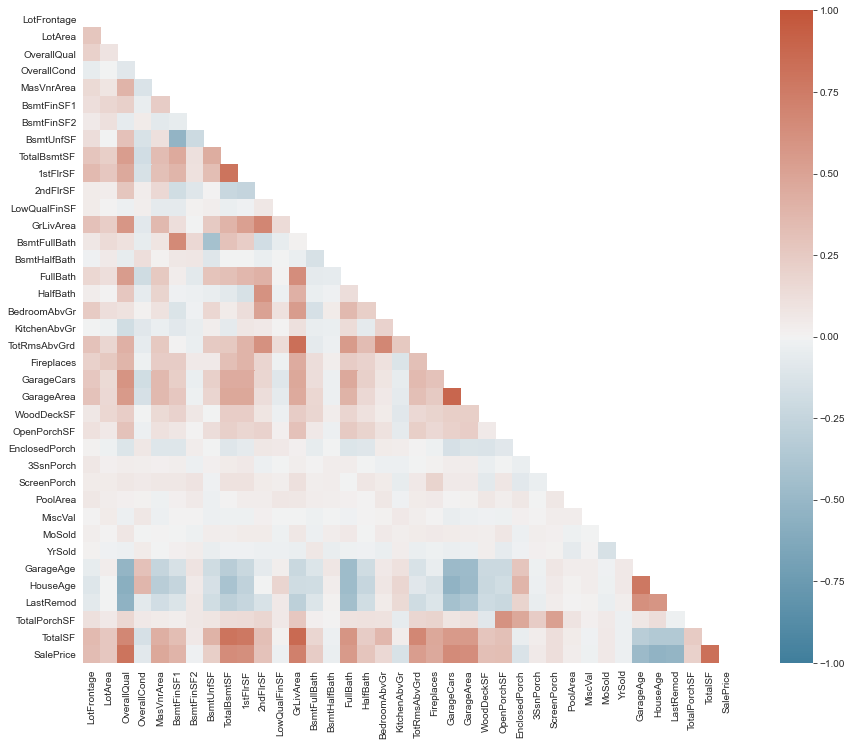

In [19]:
f = plt.subplots(figsize=(16,12))

# Check for correlation between features
cmap = sb.diverging_palette(230, 20, as_cmap=True)

corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sb.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, square=True);

A few features stand out from the correlation matrix:
- Quality related (OverallQual)
- Area related (TotalBsmtSF, TotalSF, etc.)
- Age related (HouseAge)

Skew = 1.5659592925562151


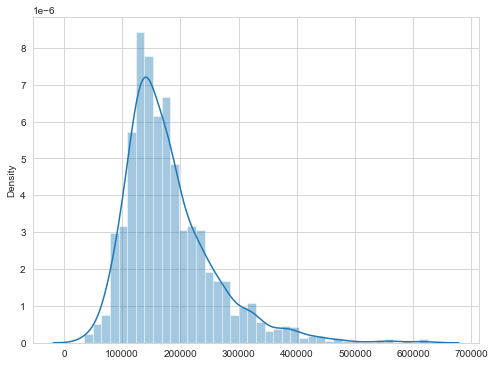

In [20]:
f = plt.subplots(figsize=(8, 6))

sb.distplot(x=df_train["SalePrice"], kde=True);

print("Skew = {}".format(df_train["SalePrice"].skew()))

The distribution of `SalePrice` is skewed. 

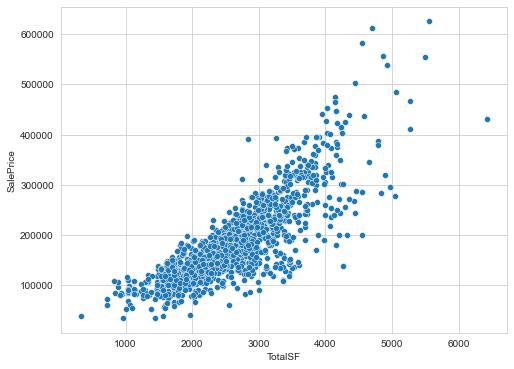

In [21]:
f = plt.subplots(figsize=(8, 6))

sb.scatterplot(data=df_train, x="TotalSF", y="SalePrice");

Here we can see how one of the features from the above correlation matrix, `TotalSf`, relates to `SalePrice`.

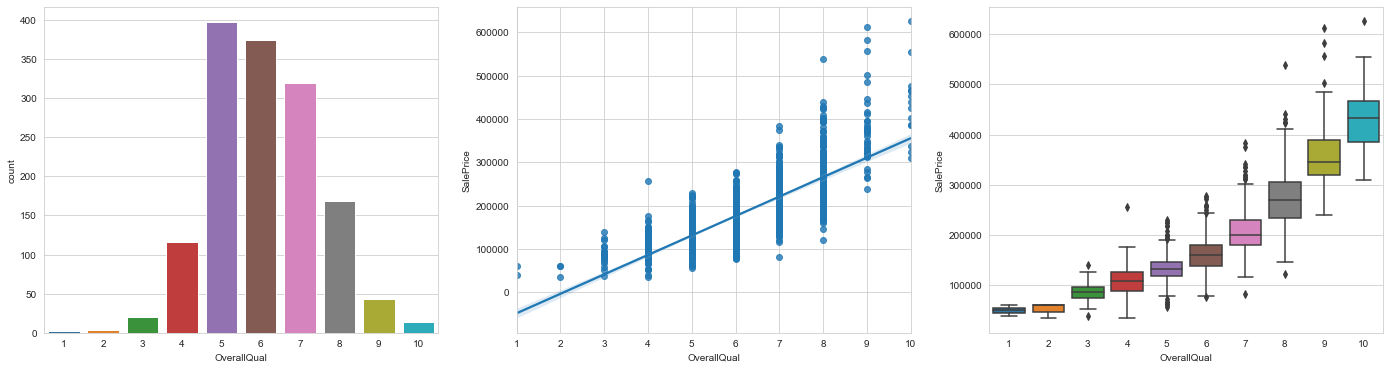

In [22]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sb.countplot(data=df_train, x="OverallQual", ax=axes[0])
sb.regplot(data=df_train, x="OverallQual", y="SalePrice", ax=axes[1]);
sb.boxplot(data=df_train, x="OverallQual", y="SalePrice", ax=axes[2]);

`OverallQual` is mostly normally distributed across all categories. From the regression plot and boxplot, we can see that as `OverallQual` increases, `SalePrice` increases as well.

We do the same for `OverallCond`.

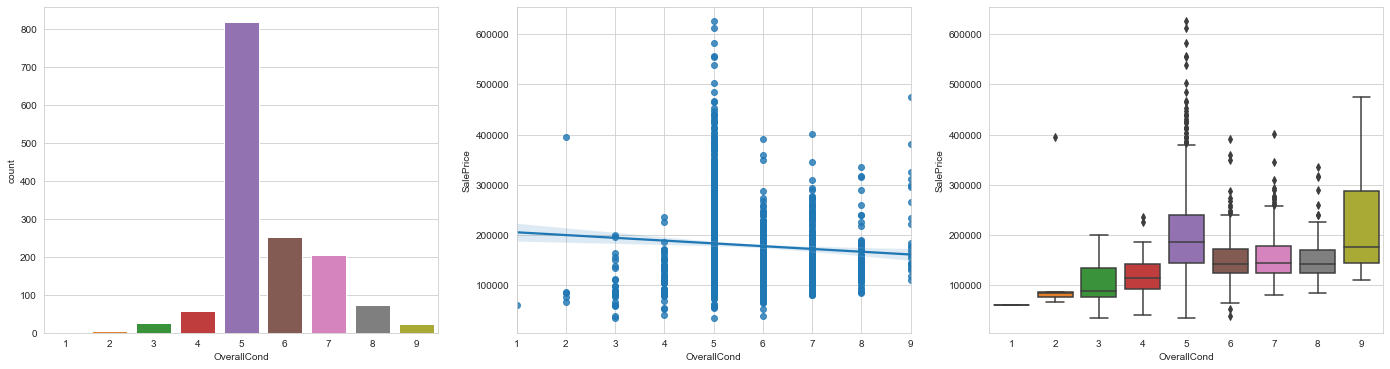

In [23]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sb.countplot(data=df_train, x="OverallCond", ax=axes[0])
sb.regplot(data=df_train, x="OverallCond", y="SalePrice", ax=axes[1]);
sb.boxplot(data=df_train, x="OverallCond", y="SalePrice", ax=axes[2]);

`SalePrice` decreases _very_ slightly as `OverallCond` decreases. The relationship is harder to observe from the boxplot alone.

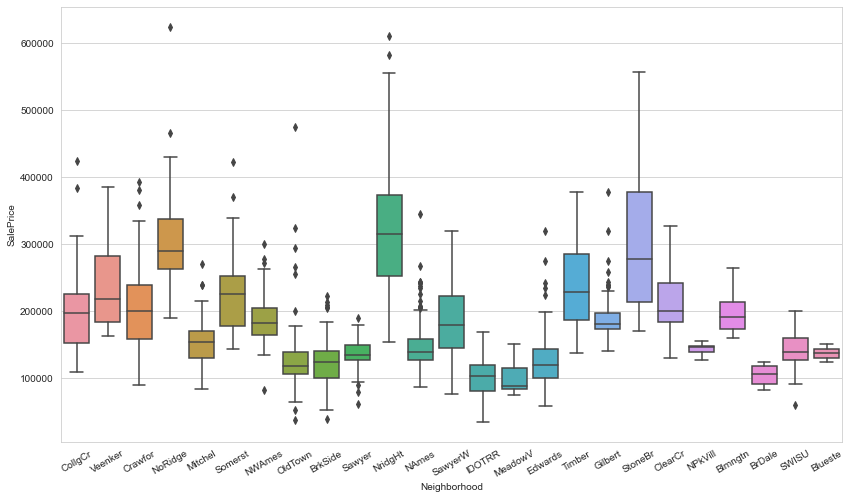

In [24]:
f = plt.subplots(figsize=(14, 8))

sb.boxplot(data=df_train, x="Neighborhood", y="SalePrice");
xt = plt.xticks(rotation=30)

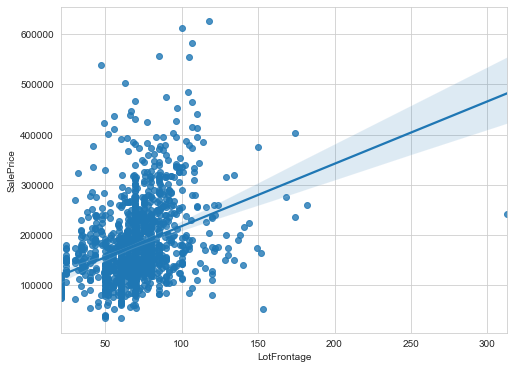

In [25]:
f = plt.subplots(figsize=(8, 6))

sb.regplot(data=df_train, x="LotFrontage", y="SalePrice");

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

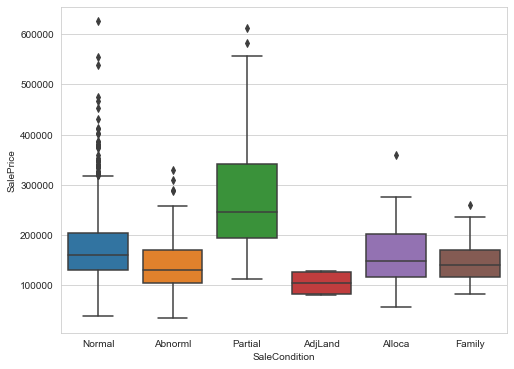

In [26]:
f = plt.subplots(figsize=(8, 6))

sb.boxplot(data=df_train, x="SaleCondition", y="SalePrice")

In [27]:
df_combined = pd.concat([df_train, df_test])
df_encoded = pd.get_dummies(df_combined)

df_train_en = df_encoded[:1456]
df_test_en = df_encoded[1456:]

In [28]:
y = df_train_en["SalePrice"]
X = df_train_en.drop(labels=["SalePrice"], axis=1)

X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706.0,0.0,150.0,856.0,856,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,0.0,978.0,0.0,284.0,1262.0,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,162.0,486.0,0.0,434.0,920.0,920,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,0.0,216.0,0.0,540.0,756.0,961,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655.0,0.0,490.0,1145.0,1145,...,0,0,0,1,0,0,0,0,1,0


In [29]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [30]:
LinReg = LinearRegression()
LinReg.fit(X, y)

LGB = LGBMRegressor()
LGB.fit(X, y)

LGBMRegressor()

In [31]:
LinReg.score(X, y)

0.9418342896043849

In [32]:
LGB.score(X, y)

0.9886036132323649

In [33]:
def plot_feature_importance(importance, names):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    x = fi_df['feature_importance']
    y = fi_df['feature_names']
    
    return x, y

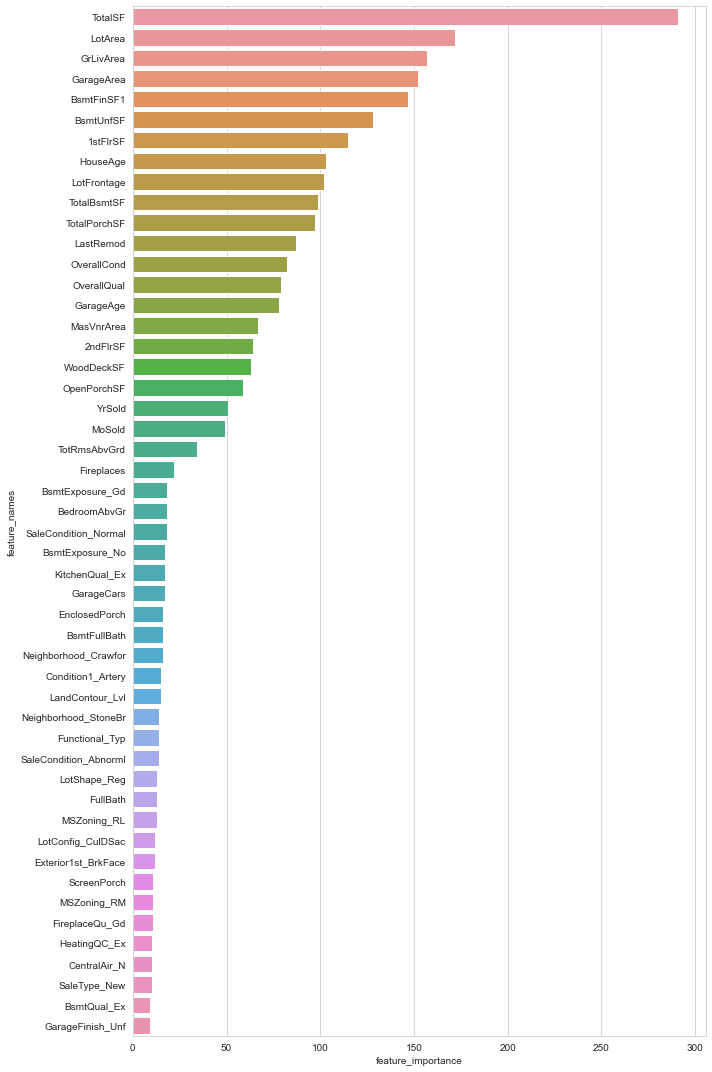

In [34]:
X_graph, y_graph = plot_feature_importance(LGB.feature_importances_, X.columns)

f = plt.figure(figsize=(10, 15))
sb.barplot(X_graph.head(50), y_graph.head(50));
plt.tight_layout()

### Making Predictions

In [35]:
df_test_en.drop(["SalePrice"], axis=1, inplace=True)

results = LGB.predict(df_test_en)

In [36]:
predictions = pd.DataFrame(results, columns=["SalePrice"])
predictions.index = predictions.index + 1461
predictions.index.names = ["Id"]

predictions.head()

,SalePrice
Id,
1461,129945.995925
1462,164499.102579
1463,182575.409398
1464,186505.016842
1465,191388.507136


In [37]:
predictions.to_csv("Predictions.csv")